In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('./west_nile/input/train.csv')
weather = pd.read_csv('./west_nile/input/weather.csv')
spray = pd.read_csv('./west_nile/input/spray.csv')
sample = pd.read_csv('./west_nile/input/sampleSubmission.csv')
test = pd.read_csv('./west_nile/input/test.csv')

In [36]:
spray['Date'] = pd.to_datetime(spray.Date)

In [42]:
pd.to_datetime(spray['Time'])

0       2018-02-26 18:56:58
1       2018-02-26 18:57:08
2       2018-02-26 18:57:18
3       2018-02-26 18:57:28
4       2018-02-26 18:57:38
5       2018-02-26 18:57:48
6       2018-02-26 18:57:58
7       2018-02-26 18:58:08
8       2018-02-26 18:58:18
9       2018-02-26 18:58:28
10      2018-02-26 18:58:38
11      2018-02-26 18:58:48
12      2018-02-26 18:58:58
13      2018-02-26 18:59:08
14      2018-02-26 18:59:18
15      2018-02-26 19:00:08
16      2018-02-26 19:00:18
17      2018-02-26 19:00:28
18      2018-02-26 19:00:38
19      2018-02-26 19:00:48
20      2018-02-26 19:00:58
21      2018-02-26 19:01:08
22      2018-02-26 19:01:18
23      2018-02-26 19:01:28
24      2018-02-26 19:01:38
25      2018-02-26 19:01:48
26      2018-02-26 19:01:58
27      2018-02-26 19:02:08
28      2018-02-26 19:02:18
29      2018-02-26 19:02:28
                ...        
14805   2018-02-26 20:28:41
14806   2018-02-26 20:28:51
14807   2018-02-26 20:29:01
14808   2018-02-26 20:29:11
14809   2018-02-26 2

In [87]:
train['Date'] = pd.to_datetime(train['Date'])

In [4]:
spray.head(3)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157


In [6]:
train.head(1)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [8]:
spray_loc = spray[['Date','Latitude','Longitude']]
spray_loc = spray_loc.rename(index=str, columns={'Latitude':'lat','Longitude':'long'})

df_loc = train[['Date','Latitude','Longitude']]
df_loc = df_loc.rename(index=str, columns={'Latitude':'lat','Longitude':'long'})

from scipy.spatial import cKDTree

In [9]:
spray_tree = cKDTree(np.array(spray_loc[['lat','long']]))

In [10]:
spray_tree.query(np.array(df_loc.iloc[233][['lat','long']]),k=1)

(0.08334509890937235, 3841)

In [11]:
print('distance from iloc233 and the nearest spray : '
      +str(spray_tree.query(np.array(df_loc.iloc[233][['lat','long']]),k=1)[0]))
print('id of nearest spray : '
      +str(spray_tree.query(np.array(df_loc.iloc[233][['lat','long']]),k=1)[1]))

distance from iloc233 and the nearest spray : 0.08334509890937235
id of nearest spray : 3841


In [12]:
type(spray_tree)

scipy.spatial.ckdtree.cKDTree

In [ ]:
# TTT_cKDTree =  tree of TTT data


# TTT_cKDTree.query(array'GGG',k , distance) = 
#            for value in array'GGG" |  with k neighbors | within distance
#
# returns     distance to neighbors, neighbor id within 'TTT'


# eg: LOCATION_A.query(np.array(LOCATION_B.iloc[7117]),k=1)
#       (0.006, 1281)
#  LOCATION_A.iloc[1281] is (0.006) away from LOCATION_B.iloc[7117]


#1 unit of lat|long = 69 miles

In [90]:
train.groupby([train['Date'].dt.year, 
               train['Date'].dt.month])[['NumMosquitos', 'WnvPresent']].sum()

NumMosquitos  WnvPresent
Date Date                          
2007 5               40           0
     6              428           0
     7             7199           6
     8            40015         200
     9             9300          28
     10            1706           2
2009 5              190           0
     6             7390           0
     7             8833           5
     8             2346           9
     9             2137           5
     10             212           0
2011 6             4049           0
     7             8445          11
     8             2968          24
     9             3337          22
2013 6             4711           1
     7            12771          24
     8            12707         144
     9             6255          70

In [17]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [16]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [96]:
mapdata = np.loadtxt("./west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")

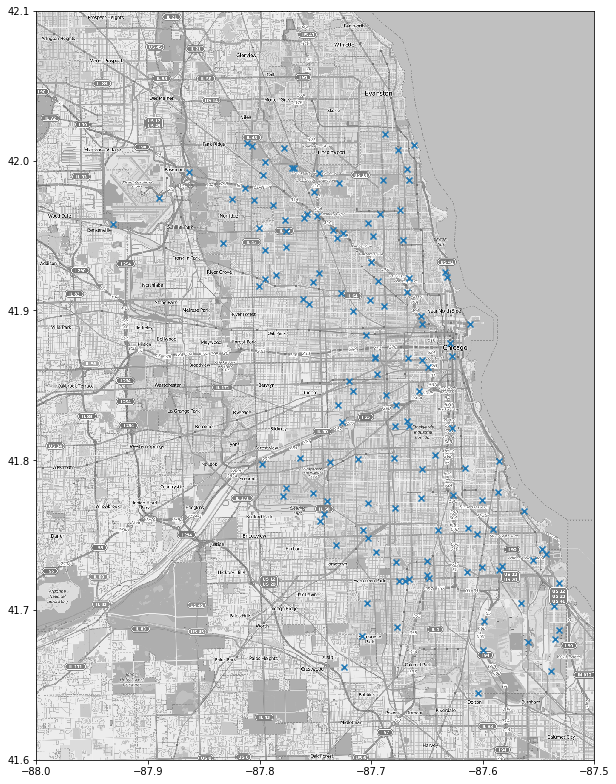

In [102]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


locations = train[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

In [13]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [22]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [ ]:
DataFrame.plot.scatter(x, y, s=None, c=None, **kwds)

In [41]:
weather.loc[845:850, 'WetBulb']

845    73
846    73
847    73
848    70
849    67
850    67
Name: WetBulb, dtype: object

In [45]:
# Convert Weather Data to 
weather.at[848, 'WetBulb'] = 70
weather.at[2410, 'WetBulb'] = 64
weather.at[2412, 'WetBulb'] = 63
weather.at[2415, 'WetBulb'] = 64

In [46]:
weather['WetBulb'] = weather.WetBulb.astype('float')

In [44]:
weather.loc[2408:2420, 'WetBulb']

2408    65
2409    65
2410     M
2411    63
2412     M
2413    64
2414    68
2415     M
2416    58
2417    57
2418    56
2419    56
2420    58
Name: WetBulb, dtype: object

In [48]:
np.corrcoef(weather.WetBulb.values, weather.DewPoint.values)

array([[ 1.        ,  0.97242219],
       [ 0.97242219,  1.        ]])

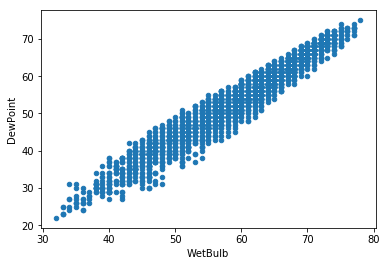

In [47]:
weather.plot.scatter('WetBulb', 'DewPoint')

In [29]:
weather[weather.WetBulb == 'M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,7,60,M,0,13,...,,0,M,0.0,0.00,M,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,0,57,M,0,8,...,,0,M,0.0,0.00,M,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71,-2,61,M,0,6,...,RA,0,M,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77,M,63,M,0,12,...,RA,M,M,M,0.66,29.27,29.92,4.5,26,7.7


In [64]:
weather[weather.Heat == 'M'].Heat.index.values[2]

675

In [68]:
weather['Heat'][6]

'7'

In [71]:
for position in weather[weather.Heat == 'M'].Heat.index.values:
    weather.at(position, 'Heat') = weather['Heat'][position - 1]

SyntaxError: can't assign to function call (<ipython-input-71-e2c79d208296>, line 2)

In [79]:
weather.at(7, 'Heat') = float(weather['Heat'][6])

SyntaxError: can't assign to function call (<ipython-input-79-7ac0d1519819>, line 1)

In [102]:
for position in weather[weather['Heat'] == 'M'].index.values:
    weather.at[position, 'Heat'] = ((float(weather.loc[position-1, 'Heat']) + 
                                    float(weather.loc[position+1, 'Heat']) / 2))

In [ ]:
weather

In [97]:
for position in weather[weather['Heat'] == 'M'].index.values:
    print(position, weather.loc[position-1, 'Heat'], weather.loc[position+1, 'Heat'])

7 7 5
505 0 0
675 11 13
1637 0 0
2067 0 0
2211 16 21
2501 5 4
2511 5 4
2525 10 8
2579 15 8
2811 0 0


In [ ]:
df.at['C', 'x'] = 10

In [100]:
weather.at(7, 'Heat') = '6'

SyntaxError: can't assign to function call (<ipython-input-100-1ca34cdca7bc>, line 1)

In [98]:
weather.at(7, 'Heat') = 6
weather.at(505, 'Heat') = 0
weather.at(675, 'Heat') = 12
weather.at(1637, 'Heat') = 0
weather.at(2067, 'Heat') = 0
weather.at(2211, 'Heat') = 18
weather.at(2501, 'Heat') = 4
weather.at(2511, 'Heat') = 4
weather.at(2525, 'Heat') = 9
weather.at(2579, 'Heat') = 11
weather.at(2811, 'Heat') = 0


SyntaxError: can't assign to function call (<ipython-input-98-7e195dbb5d46>, line 1)

In [92]:
weather[10, 'Heat']

KeyError: (10, 'Heat')

In [96]:
for position in weather[weather['Heat'] == 'M'].index.values:
    return weather.loc[position, 'Heat']

SyntaxError: 'return' outside function (<ipython-input-96-7bb33f6b4627>, line 2)

In [97]:
for position in weather[weather['Heat'] == 'M'].index.values:
    print(position, weather.loc[position-1, 'Heat'], weather.loc[position+1, 'Heat'])

7 7 5
505 0 0
675 11 13
1637 0 0
2067 0 0
2211 16 21
2501 5 4
2511 5 4
2525 10 8
2579 15 8
2811 0 0


In [84]:
weather[weather['Heat'] == 'M'].Heat

7       M
505     M
675     M
1637    M
2067    M
2211    M
2501    M
2511    M
2525    M
2579    M
2811    M
Name: Heat, dtype: object

In [23]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
